In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats


In [8]:
LOAD_FROM_WEB = True
if LOAD_FROM_WEB:
    portfolio = ["ALV", "T", "AAPL", "EVD.DE", "DLR", "O", "KRN.DE", "RYAAY", "VEUR.AS", "IQQ6.DE", "SPY", "BRK-B", "EQR", "JNJ", "UL", "SPY"]
    dfs = []
    for ticker in portfolio:
        dfs.append(pd.DataFrame(yf.Ticker(ticker).history("5y")[
                   "Close"]).rename({"Close": (ticker)}, axis=1))
        print(f"Fetched {ticker}!")
    stocks = pd.concat(dfs, axis=1)
    stocks.to_pickle("portfolio_df.pickle")
else:
    stocks = pd.read_pickle("portfolio_df.pickle")

# Create Scaled prices
stocks_scaled = stocks/stocks.iloc[0]

# Create Returns DF
returns = stocks.pct_change()

Fetched ALV!
Fetched T!
Fetched AAPL!
Fetched EVD.DE!
Fetched DLR!
Fetched O!
Fetched KRN.DE!
Fetched RYAAY!
Fetched VEUR.AS!
Fetched IQQ6.DE!
Fetched SPY!
Fetched BRK-B!
Fetched EQR!
Fetched JNJ!
Fetched UL!
Fetched SPY!


<AxesSubplot:>

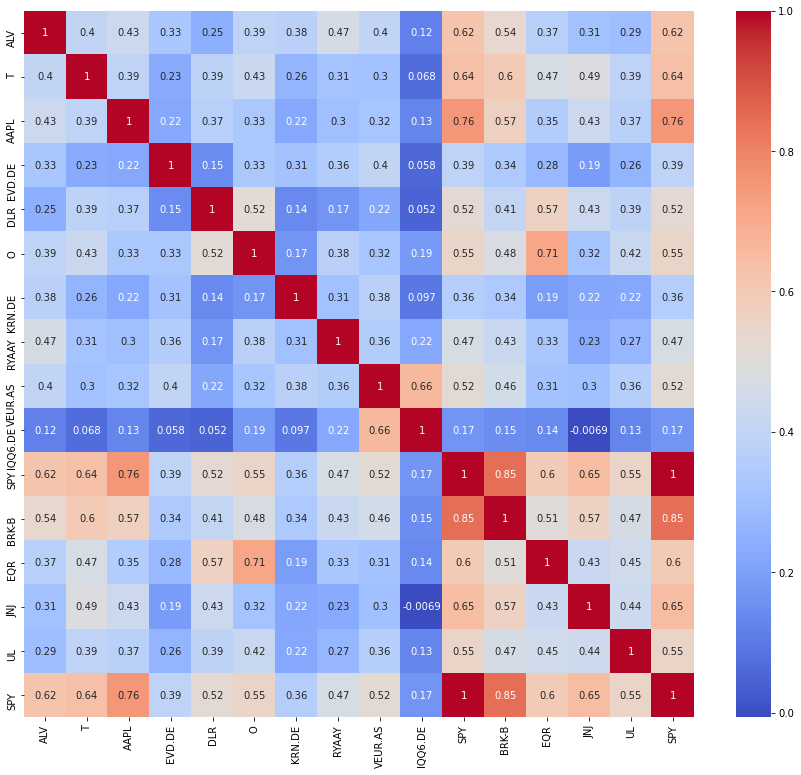

In [9]:
sfig, axes = plt.subplots(1, 1, figsize=(15, 13))
sns.heatmap(returns.corr(), annot=True, ax=axes, cmap="coolwarm")